In [764]:
import zipfile
import os

### some basic data 

In [765]:
# !kaggle datasets download -d drgilermo/nba-players-stats

# dataset_name = 'nba-players-stats'  
# dataset_path = 'data'   
# zip_file = os.path.join(dataset_path, dataset_name)

# with zipfile.ZipFile(f'{dataset_name}.zip', 'r') as zip_ref:
#     zip_ref.extractall(zip_file)

# os.system(f'rm {dataset_name}.zip')


# !kaggle datasets download -d whitefero/nba-players-measurements-19472017

# dataset_name = 'nba-players-measurements-19472017'  
# dataset_path = 'data'   
# zip_file = os.path.join(dataset_path, dataset_name)

# with zipfile.ZipFile(f'{dataset_name}.zip', 'r') as zip_ref:
#     zip_ref.extractall(zip_file)

# os.system(f'rm {dataset_name}.zip')

In [766]:
import os
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

from sklearn.preprocessing import Normalizer, RobustScaler, MaxAbsScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import tree
from tabulate import tabulate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from pandas.plotting import scatter_matrix

### data wrangling

In [767]:
seasons = pd.read_csv("data/nba-players-stats/Seasons_Stats.csv",encoding = 'utf-8')  
players = pd.read_excel("data/nba-players-measurements-19472017/Player - Bio Stats (1947-2017).xlsx")

### check data quality

In [768]:
print(players.shape)
print(players.duplicated().sum())

tabela= pd.DataFrame({
    'Unique':players.nunique(),
    'Null':players.isna().sum(),
    'NullPercent':players.isna().sum() / len(players),
    'Types':players.dtypes.values
})
display(tabela)


print(seasons.shape)
print(seasons.duplicated().sum())

tabela= pd.DataFrame({
    'Unique':seasons.nunique(),
    'Null':seasons.isna().sum(),
    'NullPercent':seasons.isna().sum() / len(seasons),
    'Types':seasons.dtypes.values
})
# display(tabela)

(4551, 15)
0


,Unique,Null,NullPercent,Types
Player Full Name,4500,1,0.000220,object
Birth Date,4122,0,0.000000,object
Year Start,72,1,0.000220,float64
Year End,72,1,0.000220,float64
Position,7,2,0.000439,object
Height (ft 1/2),3,2,0.000439,float64
Height (inches 2/2),12,2,0.000439,float64
Height (in cm),29,1,0.000220,float64
Wingspan (in cm),81,3794,0.833663,float64
Standing Reach (in cm),54,3794,0.833663,float64


(24691, 53)
0


### check distribution

In [769]:

players.rename(columns={'Player Full Name':'Player','Body Fat (%)':'Body Fat', 'Height (in cm)':'Height','Hand Width (in inches)':'Hand Width','Wingspan (in cm)':'Wingspan', 'Standing Reach (in cm)':'Standing Reach', 'Hand Length (in inches)':'Hand Length','Weight (in lb)':'Weight'},inplace = True)

# players=players.dropna()
build=players[['Player','Weight','Height','Position']]


seasons['PFG']=seasons['PF']/seasons['FG']
seasons=seasons[seasons['PFG']>0.1]
# stats=seasons[['Player','2PA','2P%','3PA','FT%','TS%','3P%']]
stats=seasons[['Player','3P%','PFG']]
stats=stats.groupby('Player').mean()
# stats.sample(10)

df=pd.merge(build, stats, how='left', on='Player')

tabela= pd.DataFrame({
    'Unique':players.nunique(),
    'Null':players.isna().sum(),
    'NullPercent':players.isna().sum() / len(players),
    'Types':players.dtypes.values
})
display(tabela)




,Unique,Null,NullPercent,Types
Player,4500,1,0.000220,object
Birth Date,4122,0,0.000000,object
Year Start,72,1,0.000220,float64
Year End,72,1,0.000220,float64
Position,7,2,0.000439,object
Height (ft 1/2),3,2,0.000439,float64
Height (inches 2/2),12,2,0.000439,float64
Height,29,1,0.000220,float64
Wingspan,81,3794,0.833663,float64
Standing Reach,54,3794,0.833663,float64


### clean data

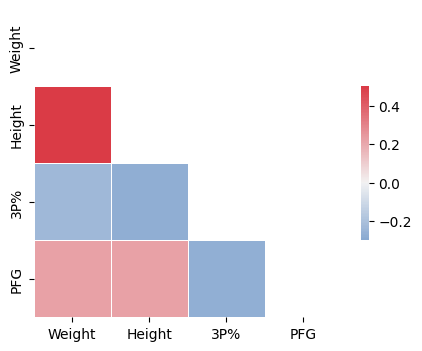

In [770]:
import numpy as np

df_corr=df.dropna()
df_corr=df_corr.drop(columns=['Player','Position'])

# Compute the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# mask =np.zeros_like(corr, dtype=bool)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5,vmin=-0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

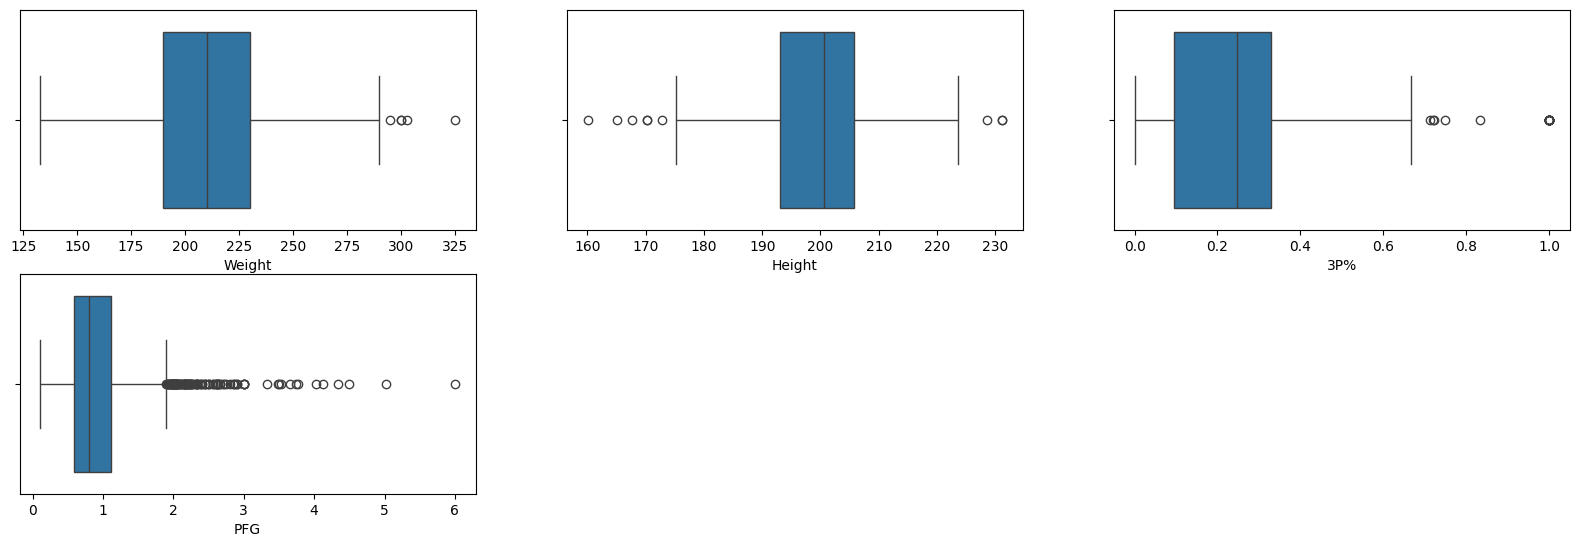

In [771]:

df=df_corr

fig = plt.figure(figsize=(20,20))
for col in range(len(df.columns)):
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=df.iloc[:,col])
plt.show()


In [772]:

# df[df['3P%']>0.4]
# df["3P%"].mean
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df=df.dropna()
df.info()

df['PFG'].mean()



<class 'pandas.core.frame.DataFrame'>
Index: 2260 entries, 0 to 4549
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  2260 non-null   float64
 1   Height  2260 non-null   float64
 2   3P%     2260 non-null   float64
 3   PFG     2260 non-null   float64
dtypes: float64(4)
memory usage: 88.3 KB


0.9318416920639897

### classification

In [773]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

target="PFG"
X=df.drop(columns=[target],axis=1)
y = pd.DataFrame(df[target]>df[target].mean())

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

/home/duan/.conda/envs/ml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [774]:
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[233  42]
 [125  52]]

Classification Report:
              precision    recall  f1-score   support

       False       0.65      0.85      0.74       275
        True       0.55      0.29      0.38       177

    accuracy                           0.63       452
   macro avg       0.60      0.57      0.56       452
weighted avg       0.61      0.63      0.60       452


Accuracy Score:
0.6305309734513275
